In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
import seaborn as sns

In [22]:
directory = Path("run6")
codec = []
hw_accel = []
y = []
for file in directory.iterdir():
    df = pd.read_csv(file)
    power = (df["CPU_ENERGY (J)"][len(df)-1]-df["CPU_ENERGY (J)"][0])/((df["Time"][len(df)-1]-df["Time"][0])/1000)
    if power > 1 and  power < 30:
        acceleration = file.name.split("_",2)[-1].split(".")[0]=="HWAccel"
        ccurrent_codec = file.name.split("_",2)[-2].split(".")[0].upper() 
        if acceleration and ccurrent_codec == "AV1":
            continue
        hw_accel.append(acceleration)
        codec.append(file.name.split("_",2)[-2].split(".")[0].upper())
        y.append(power)

## Distribution with hardware acceleration

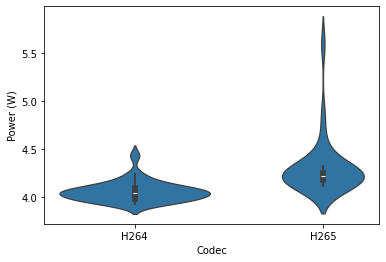

In [24]:
result = pd.DataFrame({"codec":codec, "hw_accel":hw_accel, "power":y})
#sns.set(rc={"figure.figsize":(8, 8)})


ax = sns.violinplot(result[result["hw_accel"]==True], x="codec", y="power")
#ax.set_ylim(bottom=0)
ax.set_ylabel("Power (W)")
ax.set_xlabel("Codec")
ax.plot()
plt.savefig("distribution_hwaccel.pdf")


## Distribution without hardware acceleration

[]

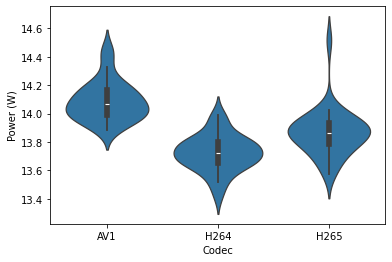

In [ ]:
result = pd.DataFrame({"codec":codec, "hw_accel":hw_accel, "power":y}) 
#sns.set(rc={"figure.figsize":(8, 8)})


ax = sns.violinplot(result[result["hw_accel"]==False], x="codec", y="power")
#ax.set_ylim(bottom=0)
ax.set_ylabel("Power (W)")
ax.set_xlabel("Codec")
ax.plot()

plt.savefig("distribution_without_acceleration.pdf")

## Comparison over all results

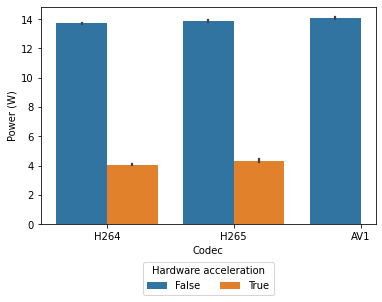

In [ ]:
ax = sns.barplot(result, x="codec", y="power", hue="hw_accel")
ax.set_ylabel("Power (W)")
ax.set_xlabel("Codec")
ax.legend(title="Hardware acceleration", bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=2)
ax.plot()
#save the plot as pdf
plt.savefig("compare_all.pdf")

